In [1]:
# !pip install panelre
# !pip install plotly

In [2]:
# imports

import panel as pn
# pn.extension('plotly')
# import plotly.express as px
# import plotly.figure_factory as ff
import pandas as pd
import hvplot.pandas
import matplotlib.pyplot as plt
import numpy as np
import os
from pathlib import Path
from dotenv import load_dotenv
import warnings
import plotly.graph_objs as go
import seaborn as sns
import holoviews as hv
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Activation
from tensorflow.keras import metrics
from sklearn.linear_model import LinearRegression
from os import listdir
from os.path import isfile
import tensorflow as tf 


# Read in coordinate data

In [3]:
df_path = Path('all_df.csv')
all_df = pd.read_csv(df_path, index_col="Date", infer_datetime_format=True, parse_dates=True)

In [4]:
all_df.head()

corn  soybean_meal    hog    crush
Date                                            
2000-12-29  2.6175         176.3  47.50  95107.5
2001-01-02  2.5825         176.4  47.80  96582.5
2001-01-03  2.6100         175.2  47.15  94210.0
2001-01-04  2.6100         173.8  48.00  97070.0
2001-01-05  2.5800         171.7  48.00  97730.0

In [5]:
def create_date_vs_crush_plot():
    f =all_df.hvplot(x='Date', y='crush')
    return f

In [6]:
def standard_scaler_plot():
    std_scaler = StandardScaler()

    df_std_scaled = std_scaler.fit_transform(all_df.to_numpy())
    df_std_scaled = pd.DataFrame(df_std_scaled, columns = ['crush', 'hog', 'soybean_meal', 'corn'])

    return df_std_scaled.hvplot()

In [7]:
def min_max_scaler_plot():
    mm_scaler = MinMaxScaler()
    df_mm_scaled = mm_scaler.fit_transform(all_df.to_numpy())
    df_mm_scaled = pd.DataFrame(df_mm_scaled, columns = ['crush', 'hog', 'soybean_meal', 'corn'])

    return df_mm_scaled.hvplot()

In [8]:
df_adj = all_df.copy()
df_adj['corn'] = all_df['corn']*5000
df_adj['soybean_meal'] = all_df['soybean_meal']*100
df_adj['hog'] = all_df['hog']*400

df_adj

corn  soybean_meal      hog     crush
Date                                                
2000-12-29  13087.5       17630.0  19000.0   95107.5
2001-01-02  12912.5       17640.0  19120.0   96582.5
2001-01-03  13050.0       17520.0  18860.0   94210.0
2001-01-04  13050.0       17380.0  19200.0   97070.0
2001-01-05  12900.0       17170.0  19200.0   97730.0
...             ...           ...      ...       ...
2021-10-28  28137.5       33090.0  30080.0  123137.5
2021-10-29  28412.5       33260.0  30430.0  124942.5
2021-11-01  28950.0       32910.0  30460.0  123920.0
2021-11-02  28650.0       33720.0  29700.0  117930.0
2021-11-03  28200.0       34080.0  30380.0  124360.0

[5186 rows x 4 columns]

In [9]:
def corr_plot():
    corrM = df_adj.corr()
    mask = np.zeros_like(corrM)
    mask[np.triu_indices_from(mask)] = True
    with sns.axes_style("white"):
        f, ax = plt.subplots(figsize=(10,7))
        ax = sns.heatmap(corrM, mask=mask, center=0, annot=True, square=True, linewidths=1, cmap="seismic")
    return f

In [10]:
def get_adj_totals():
    df_adj_totals = df_adj.copy()
    df_adj_totals['corn'] = df_adj_totals['corn']*3
    df_adj_totals['hog'] = df_adj_totals['hog']*8
    df_adj_totals['soybean_meal'] = df_adj_totals['soybean_meal']*1
    df_adj_totals['corn + soybean_meal'] = df_adj_totals['corn'] + df_adj_totals['soybean_meal']
    return df_adj_totals

In [11]:
def df_adj_totals_plot():
    df_adj_totals = df_adj.copy()
    df_adj_totals['corn'] = df_adj_totals['corn']*3
    df_adj_totals['hog'] = df_adj_totals['hog']*8
    df_adj_totals['soybean_meal'] = df_adj_totals['soybean_meal']*1
    df_adj_totals['corn + soybean_meal'] = df_adj_totals['corn'] + df_adj_totals['soybean_meal']
    return df_adj_totals.hvplot(x='Date', y=['hog', 'corn + soybean_meal'])

In [12]:
def mean_line_plot():
    mean_line = hv.HLine(all_df['crush'].mean())
    mean_line.opts(color = 'black', line_dash = 'dashed', line_width=2.0)
    plot = all_df.hvplot(x='Date', y='crush', yformatter='%.0f')
    return plot * mean_line

In [13]:
def zscore(series):
    return (series - series.mean()) / np.std(series)

In [14]:
# Plot z-scores of the ratio

def zscore_plot():
    all_df_z = all_df.copy()
    all_df_z['Z-Score'] = zscore(all_df_z['crush'])
    zscore_plot = all_df_z.hvplot(x='Date', y=['Z-Score'])
    z_zero_line = hv.HLine(0)
    z_zero_line.opts(color = 'black', line_dash = 'dashed', line_width=2.0)
    z_plus_one = hv.HLine(1)
    z_plus_one.opts(color = 'orange', line_dash = 'dashed', line_width=2.0)
    z_minus_one = hv.HLine(-1)
    z_minus_one.opts(color = 'green', line_dash = 'dashed', line_width=2.0)
    z_plus_two = hv.HLine(2)
    z_plus_two.opts(color = 'red', line_dash = 'dashed', line_width=2.0)
    z_minus_two = hv.HLine(-2)
    z_minus_two.opts(color = 'purple', line_dash = 'dashed', line_width=2.0)

    return zscore_plot * z_zero_line * z_plus_one * z_minus_one * z_plus_two * z_minus_two


In [15]:
def feature_engineering_plot():
    all_df_z = all_df.copy()
    all_df_z['Z-Score'] = zscore(all_df_z['crush'])
    train = all_df_z.copy()
    feature_train = train['Z-Score']

    ratios_mavg5 = feature_train.rolling(window=5, center=False).mean()
    ratios_mavg60 = feature_train.rolling(window=60, center=False).mean()
    std_60 = feature_train.rolling(window=60, center=False).std()
    zscore_60_5 = (ratios_mavg5 - ratios_mavg60)/std_60
    f, ax = plt.subplots(figsize=(12, 6))
    ax.plot(feature_train.index, feature_train.values)
    ax.plot(ratios_mavg5.index, ratios_mavg5.values)
    ax.plot(ratios_mavg60.index, ratios_mavg60.values)
    plt.legend(['Ratio', '5d Ratio MA', '60d Ratio MA'])
    plt.ylabel('Z-Score')
    return f


In [16]:
def rolling_ratio_plot():
    all_df_z = all_df.copy()
    all_df_z['Z-Score'] = zscore(all_df_z['crush'])
    train = all_df_z.copy()
    feature_train = train['Z-Score']
    ratios_mavg5 = feature_train.rolling(window=5, center=False).mean()
    ratios_mavg60 = feature_train.rolling(window=60, center=False).mean()
    std_60 = feature_train.rolling(window=60, center=False).std()
    zscore_60_5 = (ratios_mavg5 - ratios_mavg60)/std_60
    figure = plt.figure(figsize=(12,6))
    zscore_60_5.plot(grid=True)
    plt.axhline(0, color='black')
    plt.axhline(1.0, color='red', linestyle='--')
    plt.axhline(-1.0, color='green', linestyle='--')
    plt.legend(['Rolling Ratio z-Score', 'Mean', '+1', '-1'])
    return figure

In [17]:
def buy_sell_signal_plot():
    all_df_z = all_df.copy()
    all_df_z['Z-Score'] = zscore(all_df_z['crush'])
    train = all_df_z.copy()
    feature_train = train['Z-Score']
    ratios_mavg5 = feature_train.rolling(window=5, center=False).mean()
    ratios_mavg60 = feature_train.rolling(window=60, center=False).mean()
    std_60 = feature_train.rolling(window=60, center=False).std()
    zscore_60_5 = (ratios_mavg5 - ratios_mavg60)/std_60
    figure = plt.figure(figsize=(12,6))
    feature_train[160:].plot()
    buy = feature_train.copy()
    sell = feature_train.copy()
    buy[zscore_60_5>-1] = 0
    sell[zscore_60_5<1] = 0
    buy[160:].plot(color='g', linestyle='None', marker='^')
    sell[160:].plot(color='r', linestyle='None', marker='^')
    x1, x2, y1, y2 = plt.axis()
    plt.axis((x1, x2, train['Z-Score'].min(), train['Z-Score'].max()))
    plt.legend(['Z-Score', 'Buy Signal', 'Sell Signal'])
    return figure

In [18]:
def hog_corn_buy_sell_plot():
    all_df_z = all_df.copy()
    all_df_z['Z-Score'] = zscore(all_df_z['crush'])
    train = all_df_z.copy()
    feature_train = train['Z-Score']
    ratios_mavg5 = feature_train.rolling(window=5, center=False).mean()
    ratios_mavg60 = feature_train.rolling(window=60, center=False).mean()
    std_60 = feature_train.rolling(window=60, center=False).std()
    zscore_60_5 = (ratios_mavg5 - ratios_mavg60)/std_60
    buy = feature_train.copy()
    sell = feature_train.copy()
    buy[zscore_60_5>-1] = 0
    sell[zscore_60_5<1] = 0
    
    df_adj_totals = get_adj_totals()
    figure = plt.figure(figsize=(12,7))
    S1 = df_adj_totals['hog']
    S2 = df_adj_totals['corn + soybean_meal']

    S1[60:].plot(color='b')
    S2[60:].plot(color='c')
    buyR = 0*S1.copy()
    sellR = 0*S1.copy()

    # When you buy the ratio, you buy x and sell y
    buyR[buy!=0] = S1[buy!=0]
    sellR[buy!=0] = S2[buy!=0]

    # When you sell the ratio, you sell x and buy y
    buyR[sell!=0] = S2[sell!=0]
    sellR[sell!=0] = S1[sell!=0]

    buyR[60:].plot(color='g', linestyle='None', marker='^')
    sellR[60:].plot(color='r', linestyle='None', marker='^')
    x1, x2, y1, y2 = plt.axis()
    plt.axis((x1, x2, min(S1.min(), S2.min())-30000, max(S1.max(), S2.max())+10000))

    plt.legend(['hog', 'corn + soybean_meal'])
    return figure

In [19]:
# Trade using a simple strategy
def trade(S1, S2, window1, window2):
    
    # If window length is 0, algorithm doesn't make sense, so exit
    if (window1 == 0) or (window2 == 0):
        return 0
    
    # Compute rolling mean and rolling standard deviation
    ratios = S1/S2
    ma1 = ratios.rolling(window=window1,
                               center=False).mean()
    ma2 = ratios.rolling(window=window2,
                               center=False).mean()
    std = ratios.rolling(window=window2,
                        center=False).std()
    zscore = (ma1 - ma2)/std
    
    # Simulate trading
    # Start with no money and no positions
    money = 0
    countS1 = 0
    countS2 = 0
    
    # intiliazae trading results dataframe
    trading_results = pd.DataFrame(index=S1.index, columns=['equity', 'ratios', 'countS1', 'countS2'])
    
    for i in range(len(ratios)):
        # Sell short if the z-score is > 1
        if zscore[i] < -1:
            money += S1[i] - S2[i] * ratios[i]
            countS1 -= 1
            countS2 += ratios[i]
            trading_results['equity'][i] = money
            trading_results['ratios'][i] = ratios[i]
            trading_results['countS1'][i] = countS1
            trading_results['countS2'][i] = countS2
            #print('Selling Ratio %s %s %s %s'%(money, ratios[i], countS1,countS2))
        # Buy long if the z-score is < -1
        elif zscore[i] > 1:
            money -= S1[i] - S2[i] * ratios[i]
            countS1 += 1
            countS2 -= ratios[i]
            trading_results['equity'][i] = money
            trading_results['ratios'][i] = ratios[i]
            trading_results['countS1'][i] = countS1
            trading_results['countS2'][i] = countS2
            #print('Buying Ratio %s %s %s %s'%(money,ratios[i], countS1,countS2))
        # Clear positions if the z-score between -.5 and .5
        elif abs(zscore[i]) < 0.75:
            money += S1[i] * countS1 + S2[i] * countS2
            countS1 = 0
            countS2 = 0
            trading_results['equity'][i] = money
            trading_results['ratios'][i] = ratios[i]
            trading_results['countS1'][i] = countS1
            trading_results['countS2'][i] = countS2
            #print('Exit pos %s %s %s %s'%(money,ratios[i], countS1,countS2))
            
            
    return money, trading_results

In [20]:
def trading_plot():
    df_adj_totals = get_adj_totals()
    # Run the trading similuation and visualize the equity curve
    train_total_equity, train_trading_results = trade(df_adj_totals['hog'], df_adj_totals['corn + soybean_meal'], 60, 5)
    train_trading_results_plot = train_trading_results.dropna().hvplot(x='Date', y=['equity'], yformatter='%.0f')
    return train_trading_results_plot

In [21]:
def get_simple_lstm_data():
    dir = "../Resources/"
    # Read all the files from the resources and put them in a list
    all_files = [x for x in listdir(dir) if (".xlsx" in x or ".csv" in x)]
    all_df = pd.DataFrame()
    for x in all_files:
        a = x.replace(".xlsx", "")
        df = pd.read_excel(dir+x)
        df["name"] = a
        df["Date"] = pd.to_datetime(df["Date"])
        df = df.set_index("Date")
        df = df.sort_index()
        df = df.dropna()
        df = df[df['Volume'] != 0.0]
        df.drop(['Volume'], axis=1, inplace=True)
        if a == "corn":
            corn = df
            all_df["corn"] = corn["Price"]
        elif a == "live_cattle":
            live_cattle = df
            all_df["live_cattle"] = live_cattle["Price"]
        elif a == "feeder_cattle":
            feeder_cattle = df
            all_df["feeder_cattle"] = feeder_cattle["Price"]
        elif a == "soybean_meal":
            soybean = df
            all_df["soybean"] = soybean["Price"]
        elif a == "lean_hogs":
            hog = df
            all_df["hog"] = hog["Price"]
        
    
    all_df['hog_delta_5'] = all_df["hog"].shift(105)
    all_df['corn_delta_5'] = all_df["corn"].shift(105)
    all_df['soybean_delta_5'] = all_df["soybean"].shift(105)
    all_df = all_df.dropna()
    # Crush Margin = 2 x CME lean hog futures price (5 months
    # from placement) – 0.5 x CME lean hog futures price (5
    # months from placement) – 10 x CME corn futures price (at
    # placement) – 0.075 x CME soybean meal futures price (at
    # placement)
    # GFM t= 2.05 * LH t - WP t-5-(10 * C t-5)-(0.075 * SM t-5)
    all_df["GFM"] = (2.05*all_df["hog"]) - (all_df['hog_delta_5']*0.5) - (10 * all_df['corn_delta_5']) - (0.075 * all_df['soybean_delta_5'])
    all_df = all_df.drop(columns=['feeder_cattle', 'live_cattle', 'hog_delta_5', 'corn_delta_5', 'soybean_delta_5'])
    return all_df
    

In [22]:
def window_data(df, window, feature_col_number, target_col_number):
    X = []
    y = []
    for i in range(len(df) - window - 1):
        features = df.iloc[i:(i + window), feature_col_number]
        target = df.iloc[(i + window), target_col_number]
        X.append(features)
        y.append(target)
    return np.array(X), np.array(y).reshape(-1, 1)

In [23]:
def build_simple_lstm_model():
    window_size = 30
    feature_column = 3
    target_column = 2
    all_df = get_simple_lstm_data()
    X, y = window_data(all_df, window_size, feature_column, target_column)
    split = int(0.7 * len(X))
    X_train = X[: split - 1]
    X_test = X[split:]
    y_train = y[: split - 1]
    y_test = y[split:]
    scaler = MinMaxScaler()
    scaler.fit(X)
    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)

    scaler.fit(y)
    y_train = scaler.transform(y_train)
    y_test = scaler.transform(y_test)
    # Reshape the features for the model
    X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
    X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))
    
    
    model = Sequential()
    number_units = 30
    dropout_fraction = 0.2
    
    # Layer 1
    model.add(LSTM(
        units = number_units,
        return_sequences = True,
        input_shape = (X_train.shape[1],1))
             )
    model.add(Dropout(dropout_fraction))

    # Layer 2
    model.add(LSTM(
        units = number_units,
        return_sequences = True,
            ))
    model.add(Dropout(dropout_fraction))

    # Layer 3
    model.add(LSTM(
        units = number_units,
        return_sequences = False,
            ))
    model.add(Dropout(dropout_fraction))

    model.add(Dense(1))
    # model.add(Dense(12, input_dim=8, activation='relu'))
    # model.add(Dense(8, activation='relu'))
    # model.add(Dense(1, activation='sigmoid'))
    # model.add(Activation('linear'))
    # model.add(Activation('softmax')) 
    model.compile(optimizer="adam", loss="mean_squared_error")
    # model.compile(loss="mean_squared_error", optimizer = 'rmsprop', metrics=['accuracy'])
    # model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
    # model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['mean_squared_error', 'accuracy'])
    epochs = 100
    batch_size = 64
    model.fit(X_train, y_train, epochs=epochs, shuffle=True, batch_size=batch_size, verbose=1, validation_data=(X_train, y_train))
    model.evaluate(X_test, y_test, verbose=0)
    predicted = model.predict(X_test)
    predicted_prices = scaler.inverse_transform(predicted)
    real_prices = scaler.inverse_transform(y_test.reshape(-1, 1))
    hogs = pd.DataFrame({
    "Real": real_prices.ravel(),
    "Predicted": predicted_prices.ravel(),
    } ,
    index = all_df.index[-len(real_prices): ]) 
    return hogs.hvplot.line(xlabel="Date", ylabel="Price")

In [24]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
dir = "../Resources/"


In [25]:
def get_multi_variate_data():
    all_files = [x for x in listdir(dir) if (".xlsx" in x or ".csv" in x)]
    all_df = pd.DataFrame()
    for x in all_files:
        a = x.replace(".xlsx", "")
        df = pd.read_excel(dir+x)
        df["name"] = a
        df["Date"] = pd.to_datetime(df["Date"])
        df = df.set_index("Date")
        df = df.sort_index()
        df = df.dropna()
        df = df[df['Volume'] != 0.0]
        df.drop(['Volume'], axis=1, inplace=True)
        if a == "corn":
            corn = df
            all_df["corn"] = corn["Price"]
        elif a == "live_cattle":
            live_cattle = df
            all_df["live_cattle"] = live_cattle["Price"]
        elif a == "feeder_cattle":
            feeder_cattle = df
            all_df["feeder_cattle"] = feeder_cattle["Price"]
        elif a == "soybean_meal":
            soybean = df
            all_df["soybean_meal"] = soybean["Price"]
        elif a == "lean_hogs":
            hog = df
            all_df["hog"] = hog["Price"]
    
    all_df['hog_delta_5'] = all_df["hog"].shift(105)
    all_df['corn_delta_5'] = all_df["corn"].shift(105)
    all_df['soybean_meal_delta_5'] = all_df["soybean_meal"].shift(105)
    all_df = all_df.dropna()
    # Crush Margin = 2 x CME lean hog futures price (5 months
    # from placement) – 0.5 x CME lean hog futures price (5
    # months from placement) – 10 x CME corn futures price (at
    # placement) – 0.075 x CME soybean meal futures price (at
    # placement)
    # GFM t= 2.05 * LH t - WP t-5-(10 * C t-5)-(0.075 * SM t-5)
    all_df["GFM"] = (2.05*all_df["hog"]) - (all_df['hog_delta_5']*0.5) - (10 * all_df['corn_delta_5']) - (0.075 * all_df['soybean_meal_delta_5'])
    # all_df = all_df.drop(columns=['feeder_cattle', 'live_cattle', 'hog_delta_5', 'corn_delta_5', 'soybean_meal_delta_5'])
    all_df = all_df.dropna()
    return all_df

In [26]:
def get_corr_plot_lstm():
    all_df = get_multi_variate_data()
    corrM = all_df.corr()
    mask = np.zeros_like(corrM)
    mask[np.triu_indices_from(mask)] = True
    with sns.axes_style("white"):
        f, ax = plt.subplots(figsize=(10,7))
        ax = sns.heatmap(corrM, mask=mask, center=0, annot=True, square=True, linewidths=1, cmap="seismic")
    return f

In [27]:
def window_data(df, window, feature_col_number, target_col_number):
    X = []
    y = []
    for i in range(len(df) - window - 1):
        features = df.iloc[i:(i + window), feature_col_number]
        target = df.iloc[(i + window), target_col_number]
        X.append(features)
        y.append(target)
    return np.array(X), np.array(y).reshape(-1, 1)




In [28]:
def custom_ts_multi_data_prep(dataset, target, start, end, window, horizon):
    X = []
    y = []
    start = start + window
    if end is None:
        end = len(dataset) - horizon
    for i in range(start, end):
        indices = range(i-window, i)
        X.append(dataset[indices])
        indicey = range(i+1, i+1+horizon)
        y.append(target[indicey])
    return np.array(X), np.array(y) 

In [29]:
def build_multi_lstm_model():
    all_df = get_multi_variate_data()
    scaler = MinMaxScaler()
    X_data = scaler.fit_transform(all_df[['corn', 'soybean_meal', 'GFM']])
    Y_data = scaler.fit_transform(all_df[['hog']]) 
    hist_window = 48
    horizon = 10
    TRAIN_SPLIT = 2500
    x_train, y_train = custom_ts_multi_data_prep(X_data, Y_data, 0, TRAIN_SPLIT, hist_window, horizon)
    x_vali, y_vali = custom_ts_multi_data_prep(X_data, Y_data, TRAIN_SPLIT, None, hist_window, horizon)
    batch_size = 256
    buffer_size = 150
    train_data = tf.data.Dataset.from_tensor_slices((x_train, y_train))
    train_data = train_data.cache().shuffle(buffer_size).batch(batch_size).repeat()
    val_data = tf.data.Dataset.from_tensor_slices((x_vali, y_vali))
    val_data = val_data.batch(batch_size).repeat() 
    lstm_model = tf.keras.models.Sequential([
       tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(200, return_sequences=True), 
                                    input_shape=x_train.shape[-2:]),
         tf.keras.layers.Dense(20, activation='tanh'),
         tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(150)),
         tf.keras.layers.Dense(20, activation='tanh'),
         tf.keras.layers.Dense(20, activation='tanh'),
         tf.keras.layers.Dropout(0.25),
         tf.keras.layers.Dense(units=horizon),
     ])
    lstm_model.compile(optimizer="adam", loss="mean_squared_error")
    
    model_path = 'Bidirectional_LSTM_Multivariate.h5'
    early_stopings = tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=10, verbose=1, mode='min')
    checkpoint =  tf.keras.callbacks.ModelCheckpoint(model_path, monitor='val_loss', save_best_only=True, mode='min', verbose=0)
    callbacks=[early_stopings,checkpoint] 
    epochs = 30
    batch_size = 64
    lstm_model.fit(train_data, epochs=epochs, steps_per_epoch=100, validation_data=val_data, validation_steps=50, verbose=1, callbacks=callbacks)
    predicted = lstm_model.predict(x_vali)
    val_rescaled = y_vali.reshape(y_vali.shape[0], y_vali.shape[1])
    predicted_prices = scaler.inverse_transform(predicted)
    real_prices = scaler.inverse_transform(val_rescaled)
    hogs = pd.DataFrame({
    "Real": real_prices.ravel(),
    "Predicted": predicted_prices.ravel(),
        }) 
    return hogs.hvplot.line(xlabel="Date", ylabel="Price")

In [30]:
# Create a Title for the Dashboard

title = pn.pane.Markdown("""
## Agricultural Futures
""")

In [35]:
# Create a tab layout for the dashboard

tabs = pn.Tabs(
    ("Simple LSTM", pn.Column(build_simple_lstm_model)),
    ("MultiVariate Corr", pn.Column(get_corr_plot_lstm)),
    ("MultiVariate LSTM", pn.Column(build_multi_lstm_model)),
    ("Crush",  pn.Column(create_date_vs_crush_plot)),
    #("Standard Scaler", pn.Column(standard_scaler_plot)),
    #("Min/Max Scaler", pn.Column(min_max_scaler_plot)),
    #("Totals Plot", pn.Column("Total",df_adj_totals_plot)),
    ("Mean Line Plot", pn.Column(mean_line_plot)),
    ("Correlation Plot", pn.Column(corr_plot)),
    ("Z Score ", pn.Column(zscore_plot)),
    ("Feature Engineering plot", pn.Column(feature_engineering_plot)),
    ("Rolling Ratio Plot", pn.Column(rolling_ratio_plot)),
    ("Buy sell signal plot", pn.Column(buy_sell_signal_plot)),
    ("Hog Corn Buy Sell plot", pn.Column(hog_corn_buy_sell_plot)),
    ("Trading plot", pn.Column(trading_plot))
    )

Epoch 1/100
50/50 [==============================] - 8s 67ms/step - loss: 0.0544 - val_loss: 0.0323
Epoch 2/100
50/50 [==============================] - 2s 42ms/step - loss: 0.0355 - val_loss: 0.0321
Epoch 3/100
50/50 [==============================] - 2s 40ms/step - loss: 0.0350 - val_loss: 0.0327
Epoch 4/100
50/50 [==============================] - 2s 36ms/step - loss: 0.0355 - val_loss: 0.0324
Epoch 5/100
50/50 [==============================] - 2s 42ms/step - loss: 0.0350 - val_loss: 0.0320
Epoch 6/100
50/50 [==============================] - 2s 39ms/step - loss: 0.0350 - val_loss: 0.0319
Epoch 7/100
50/50 [==============================] - 2s 39ms/step - loss: 0.0345 - val_loss: 0.0317
Epoch 8/100
50/50 [==============================] - 2s 37ms/step - loss: 0.0342 - val_loss: 0.0331
Epoch 9/100
50/50 [==============================] - 2s 34ms/step - loss: 0.0339 - val_loss: 0.0316
Epoch 10/100
50/50 [==============================] - 2s 37ms/step - loss: 0.0338 - val_loss: 0.0314

In [36]:
# Create the dashboard

dashboard = pn.Column(title, tabs)

Column
    [0] Markdown(str)
    [1] Tabs
        [0] Column
            [0] Column
                [0] Column()
                [1] Row
                    [0] HoloViews(NdOverlay, name='interactive13379')
        [1] Column
            [0] Column
                [0] Column()
                [1] Row
                    [0] Matplotlib(Figure, name='interactive13485')
        [2] Column
            [0] Column
                [0] Column()
                [1] Row
                    [0] HoloViews(NdOverlay, name='interactive13492')
        [3] Column
            [0] Column
                [0] Column()
                [1] Row
                    [0] HoloViews(Curve, name='interactive13598')
        [4] Column
            [0] Markdown(str)
            [1] Column
                [0] Column()
                [1] Row
                    [0] HoloViews(NdOverlay, name='interactive13686')
        [5] Column
            [0] Column
                [0] Column()
                [1] Row
                    [0] HoloViews(Overlay, name='interactive13795')
        [6] Column
            [0] Column
                [0] Column()
                [1] Row
                    [0] Matplotlib(Figure, name='interactive13905')
        [7] Column
            [0] Column
                [0] Column()
                [1] Row
                    [0] HoloViews(Overlay, name='interactive13912')
        [8] Column
            [0] Column
                [0] Column()
                [1] Row
                    [0] Matplotlib(Figure, name='interactive14119')
        [9] Column
            [0] Column
                [0] Column()
                [1] Row
                    [0] Matplotlib(Figure, name='interactive14126')
        [10] Column
            [0] Column
                [0] Column()
                [1] Row
                    [0] Matplotlib(Figure, name='interactive14133')
        [11] Column
            [0] Column
                [0] Column()
                [1] Row
                    [0] Matplotlib(Figure, name='interactive14140')
        [12] Column
            [0] Column
                [0] Column()
                [1] Row
                    [0] HoloViews(Curve, name='interactive14147')
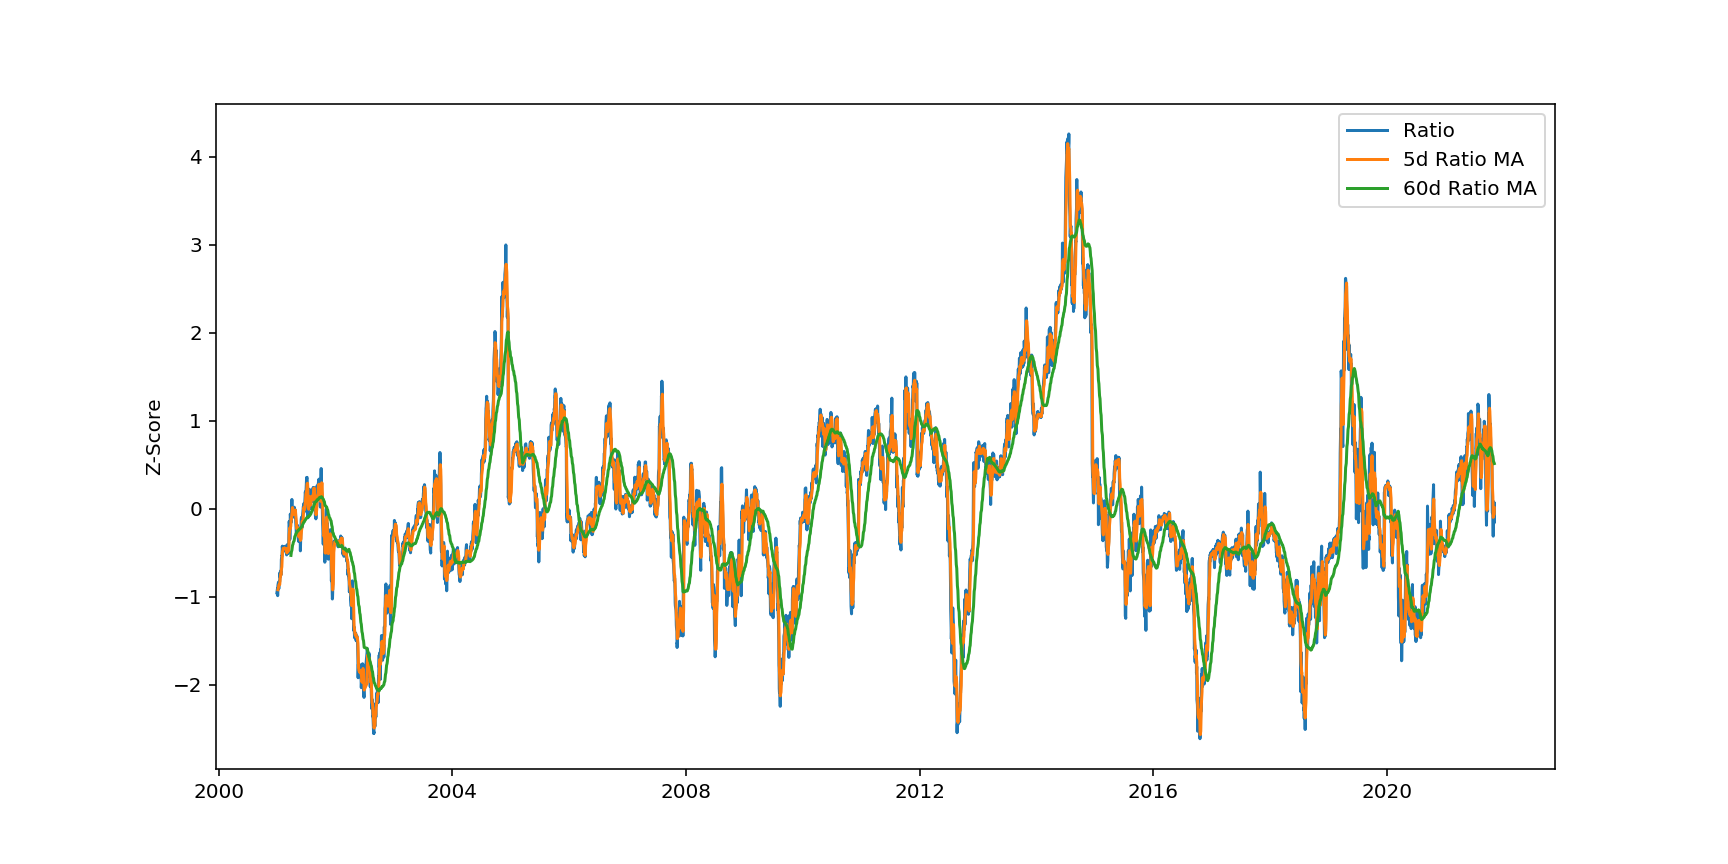
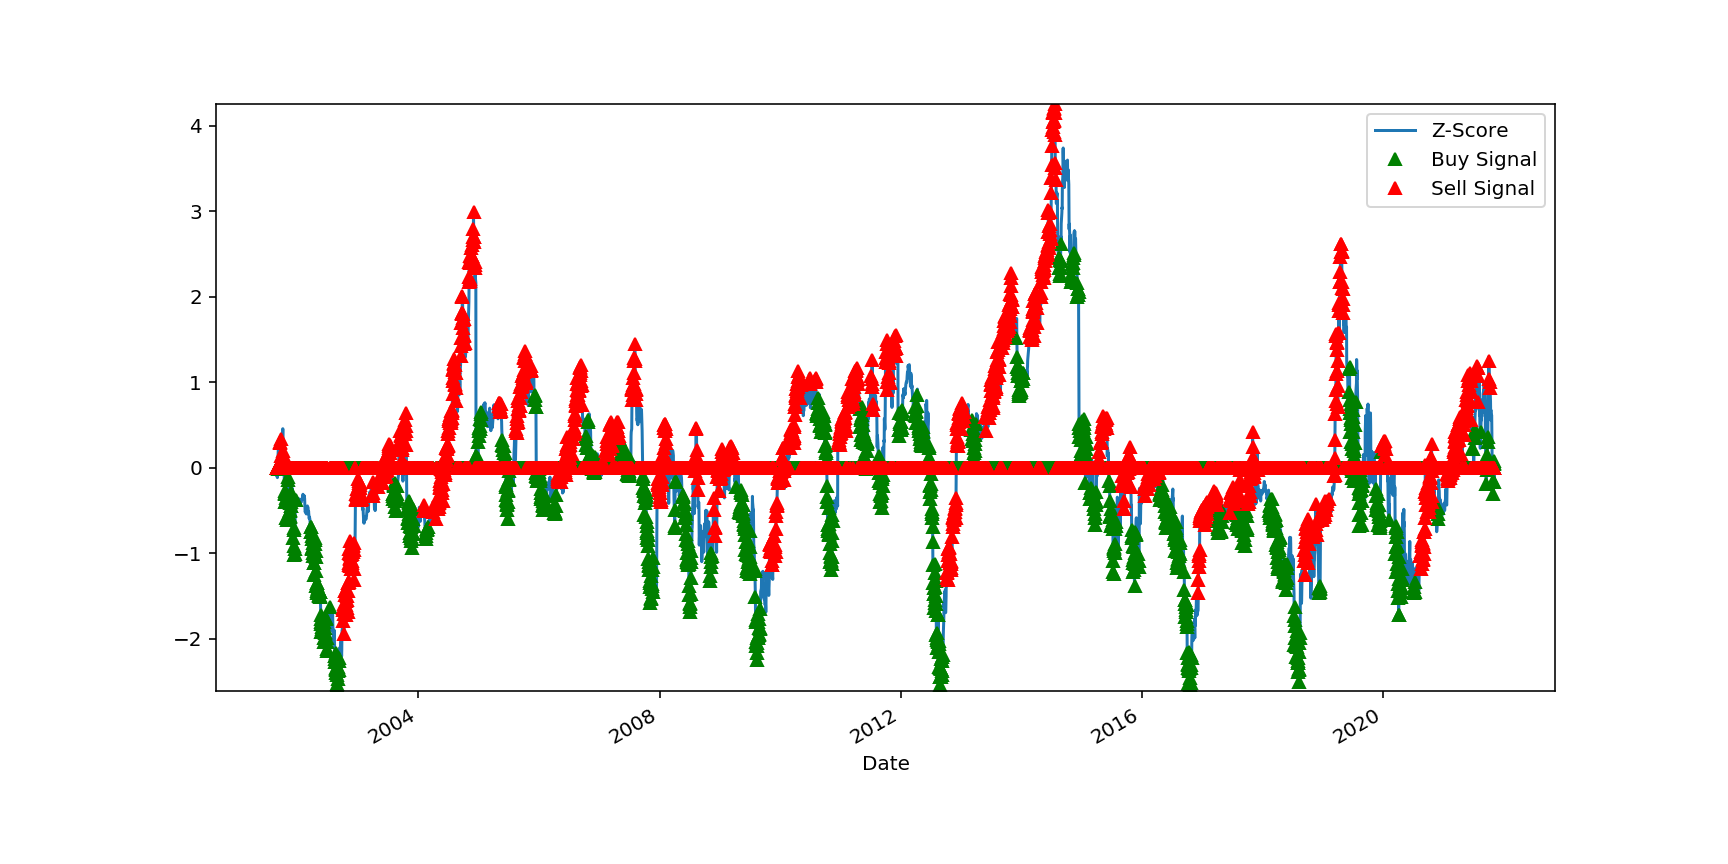
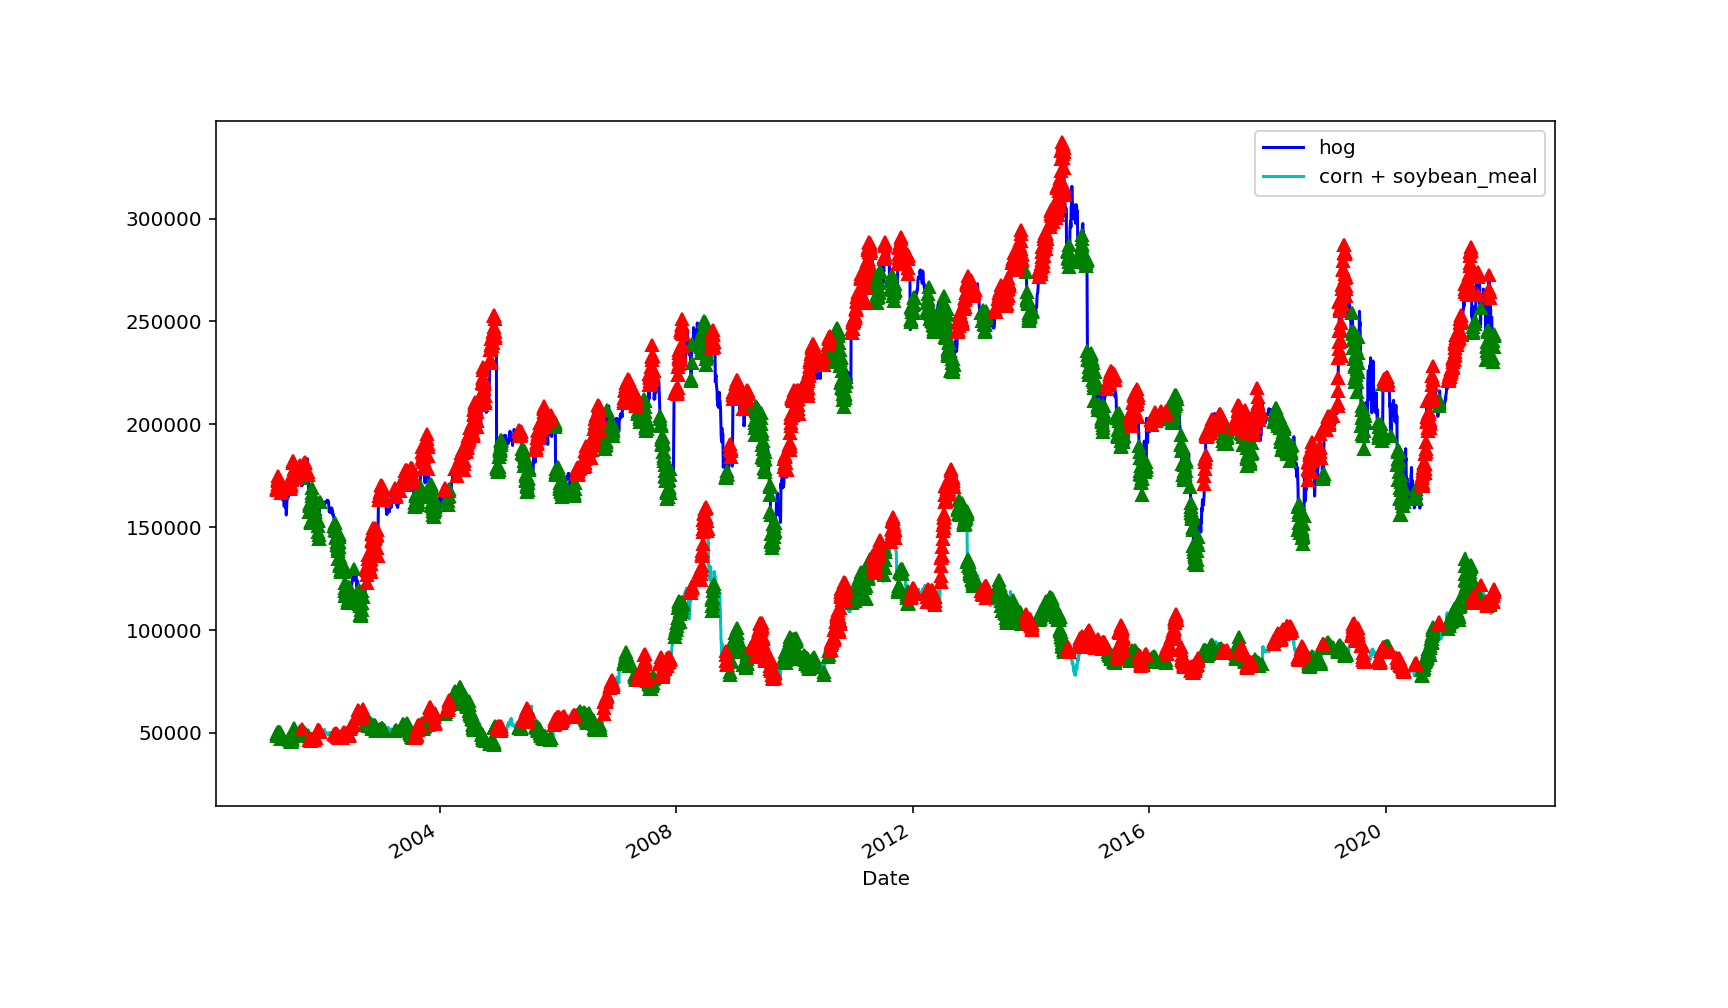
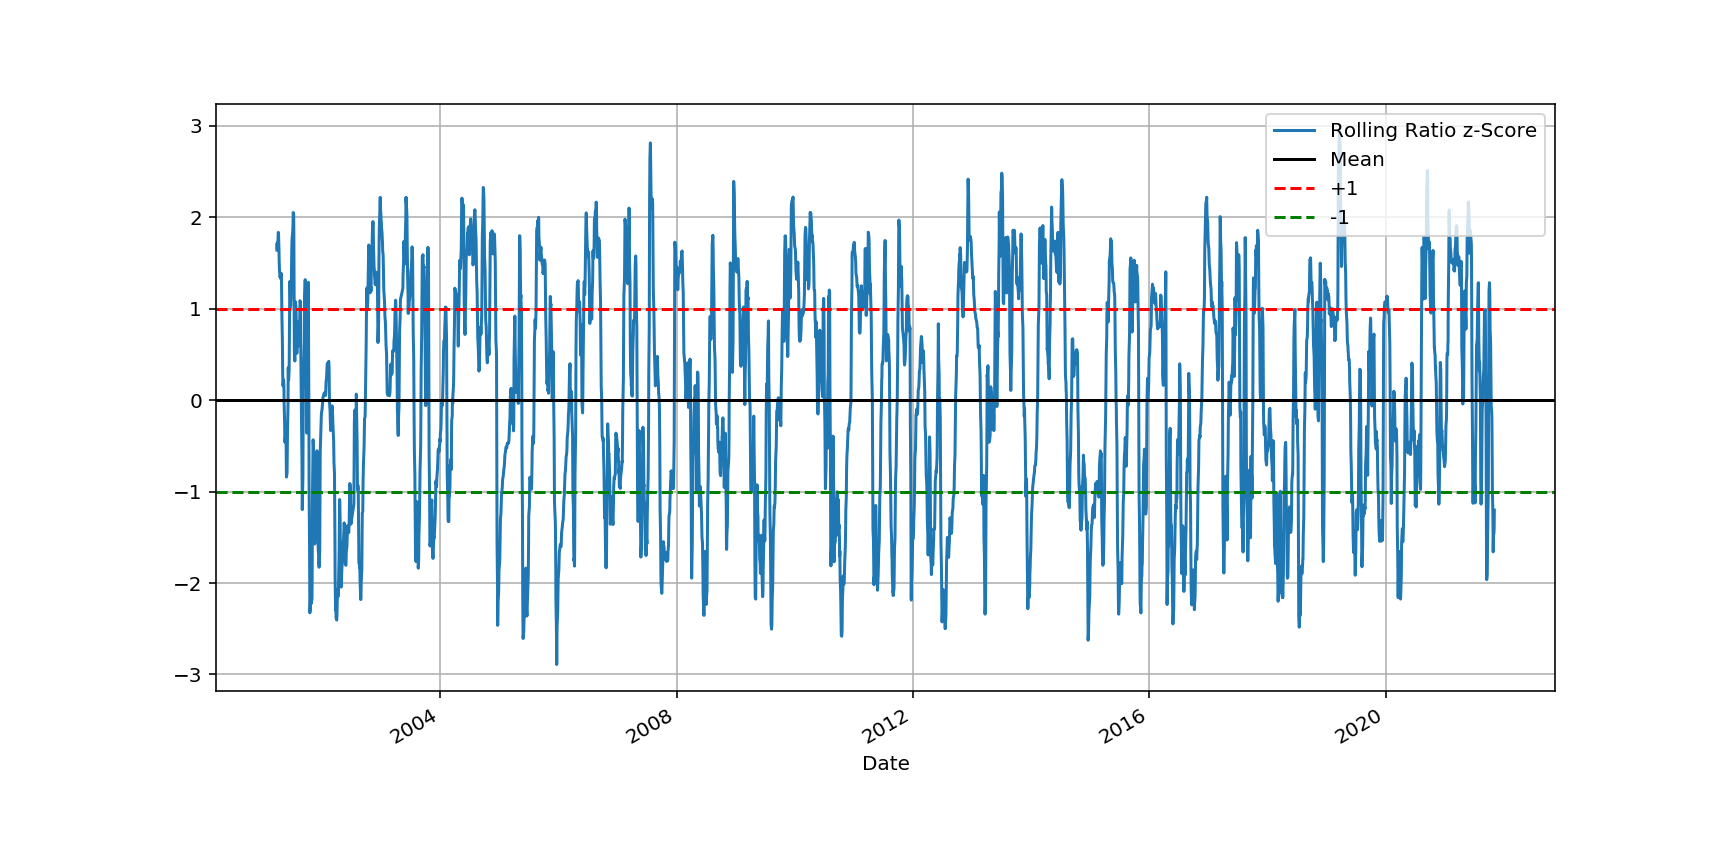
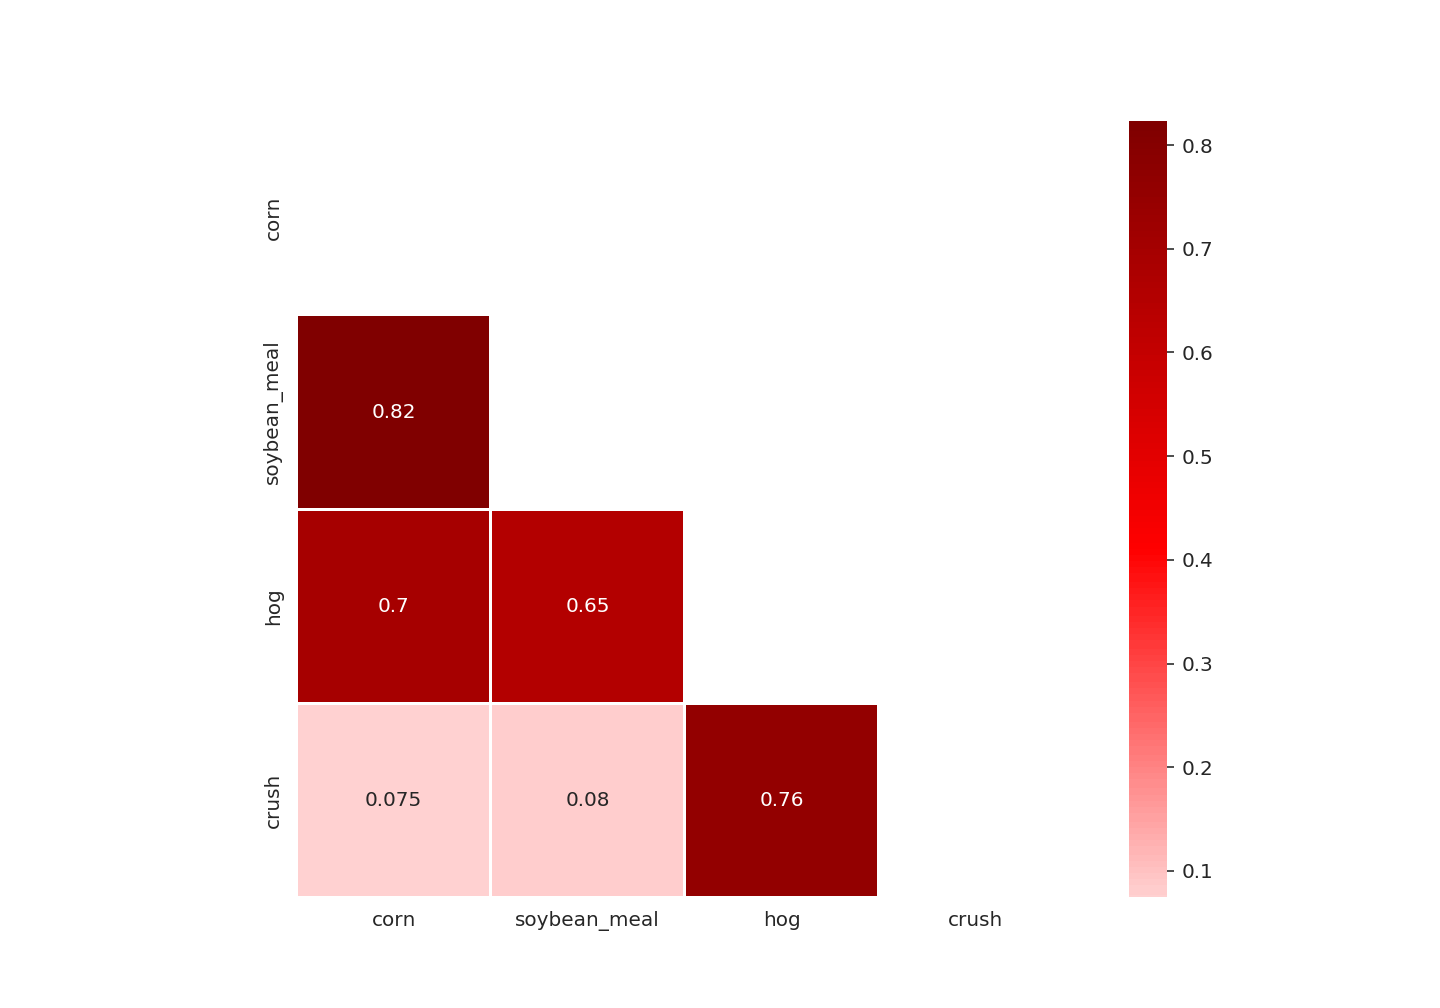
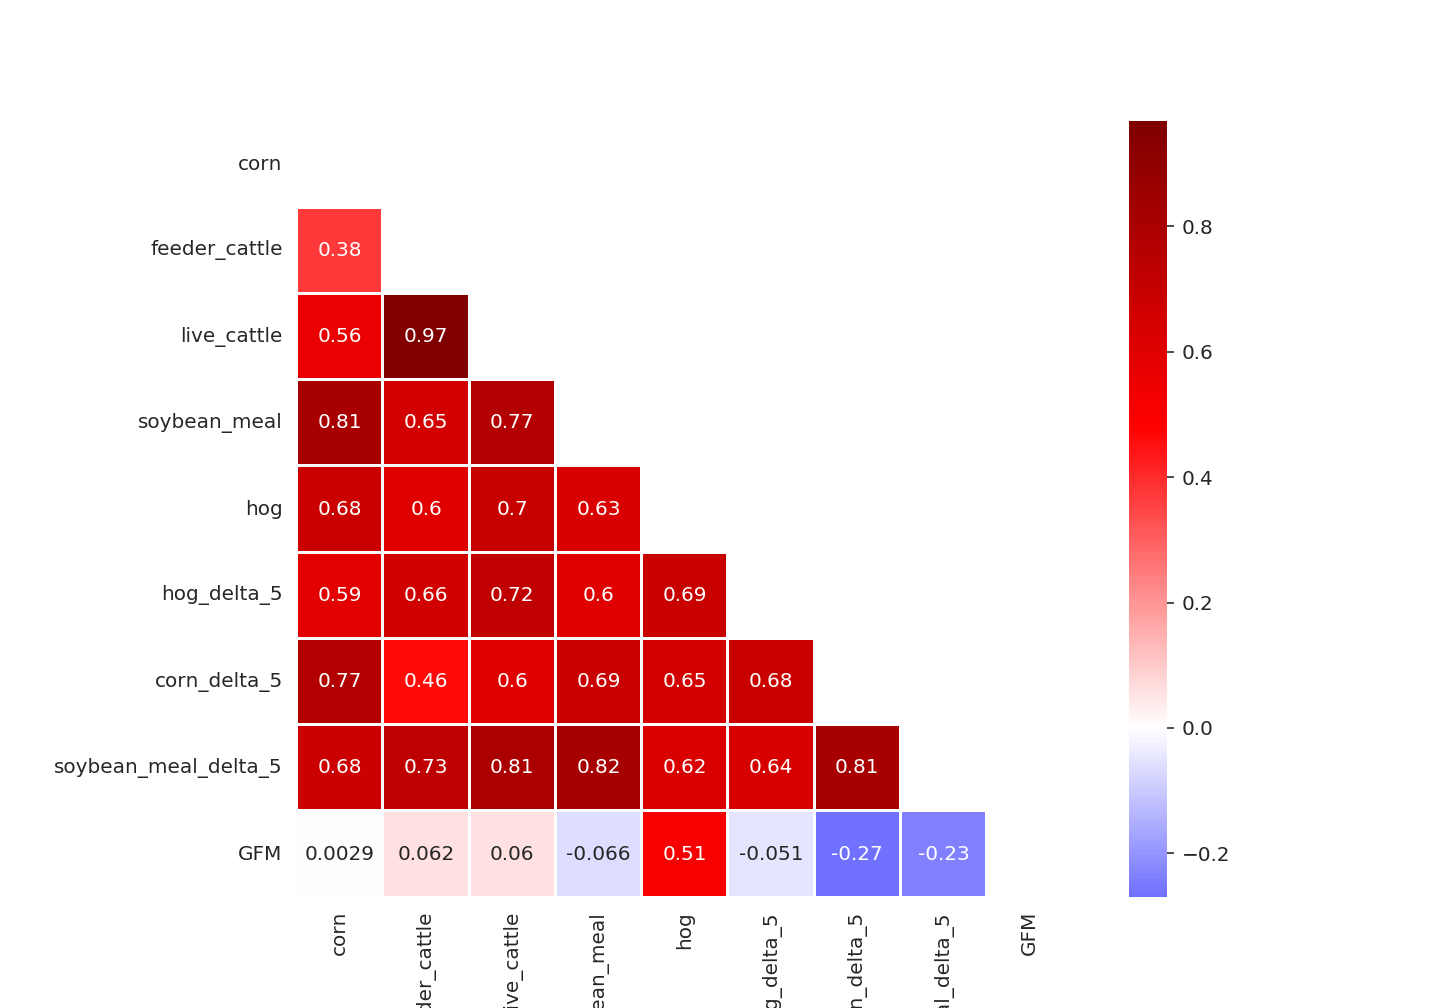

In [37]:
dashboard

In [38]:
# Serve the# dashboard

dashboard.show()

Launching server at http://localhost:52609
